In [1]:
# Install necessary packages
!pip install pandas numpy plotly dash jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [8]:
#loading the files
import pandas as pd
df = pd.read_csv('synthetic_health_data.csv')
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_health_data.csv'

In [ ]:
# Initial inspection (to visualize the few rows from our data)
print(df.info())
print("______________________________________________________________")
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
None
______________________________________________________________
         Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904

In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


# **Descriptive Statitstics**

---



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,40.231985,11.750591,1.104792,32.228916,40.303607,47.775327,86.232778
BMI,1000.0,25.354181,4.987272,10.298057,21.968792,25.315386,28.644411,40.965538
Exercise_Frequency,1000.0,2.888000,1.995354,0.000000,1.000000,3.000000,5.000000,6.000000
Diet_Quality,1000.0,69.952977,14.972061,19.907497,59.945481,69.975151,80.527839,110.265186
Sleep_Hours,1000.0,6.973135,1.517218,2.431107,5.903351,6.990847,8.054595,11.638962
Smoking_Status,1000.0,0.499000,0.500249,0.000000,0.000000,0.000000,1.000000,1.000000
Alcohol_Consumption,1000.0,3.079377,2.084564,-3.592506,1.644111,3.064261,4.489293,11.105100
Health_Score,1000.0,85.479947,13.633845,29.106017,76.430819,87.498996,99.762644,100.000000


# **Frequency Distribution**

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

This variables are countious so we can go with histograms

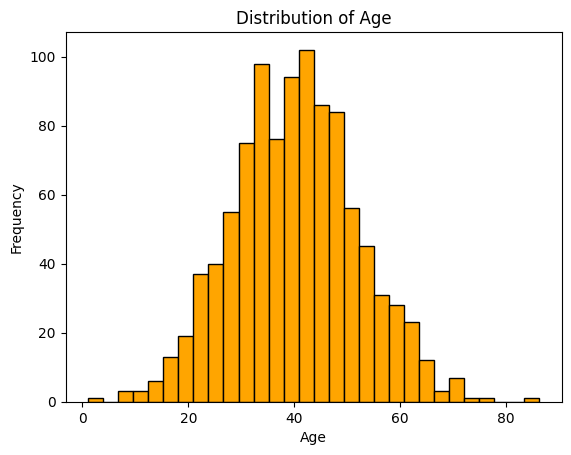

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

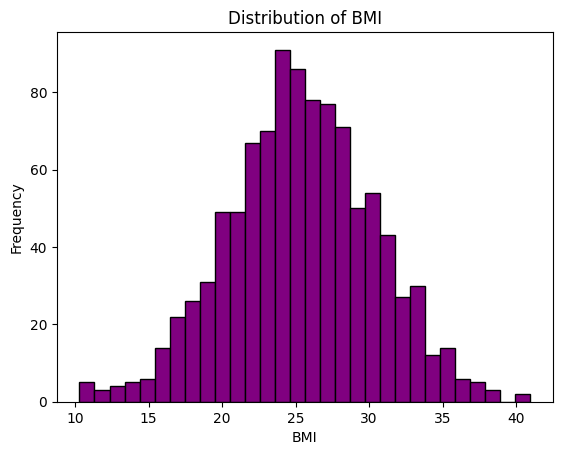

In [ ]:
plt.hist(df['BMI'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

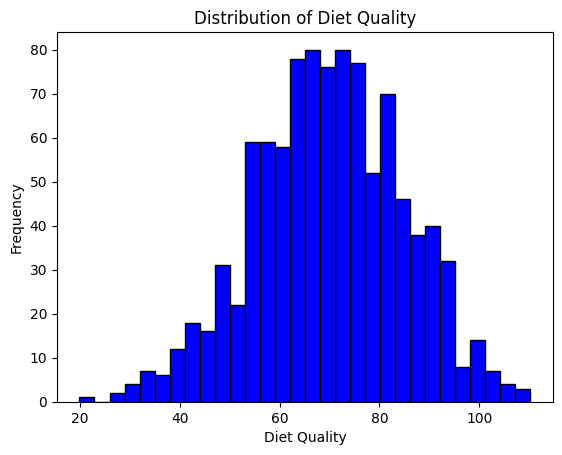

In [ ]:
plt.hist(df['Diet_Quality'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Frequency')
plt.show()

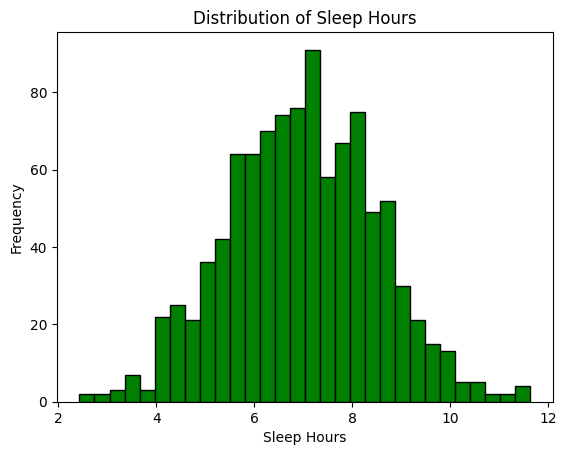

In [ ]:
plt.hist(df['Sleep_Hours'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

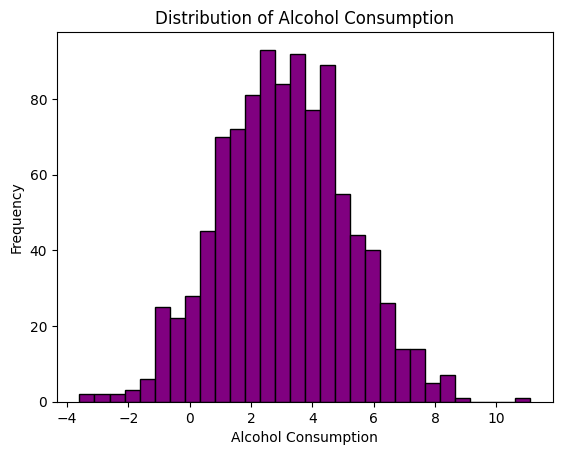

In [ ]:
plt.hist(df['Alcohol_Consumption'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Frequency')
plt.show()

Both Exercise freq and the somking Stautus variables are not Continuous, Smoking stautus is catogorical and Exercise frequency is discrit so we go to bar charts

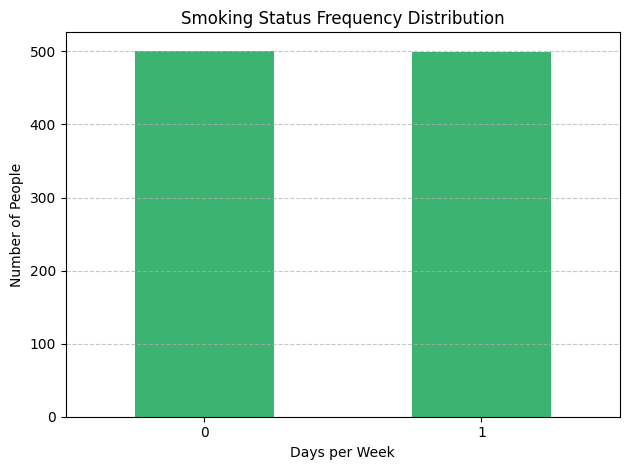

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Smoking_Status
def plot_Smoking_Status(df):
    counts = df['Smoking_Status'].value_counts().sort_index()
    counts.plot(kind='bar', color='mediumseagreen')
    plt.title('Smoking Status Frequency Distribution')
    plt.xlabel('Days per Week')
    plt.ylabel('Number of People')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
plot_Smoking_Status(df)



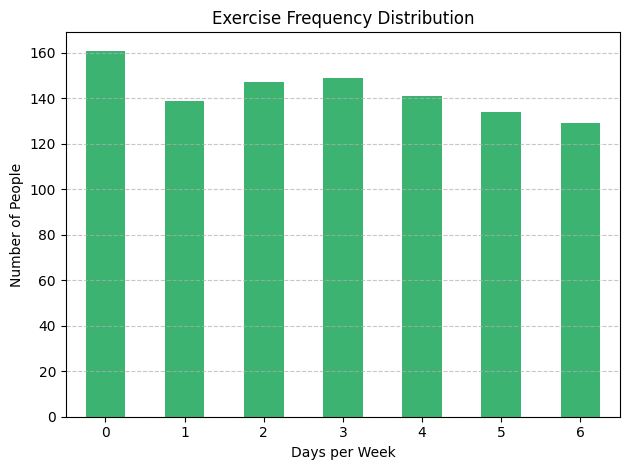

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Exercise_Frequency
def plot_exercise_frequency(df):
    counts = df['Exercise_Frequency'].value_counts().sort_index()
    counts.plot(kind='bar', color='mediumseagreen')
    plt.title('Exercise Frequency Distribution')
    plt.xlabel('Days per Week')
    plt.ylabel('Number of People')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
plot_exercise_frequency(df)


Continuous variable and our furure target

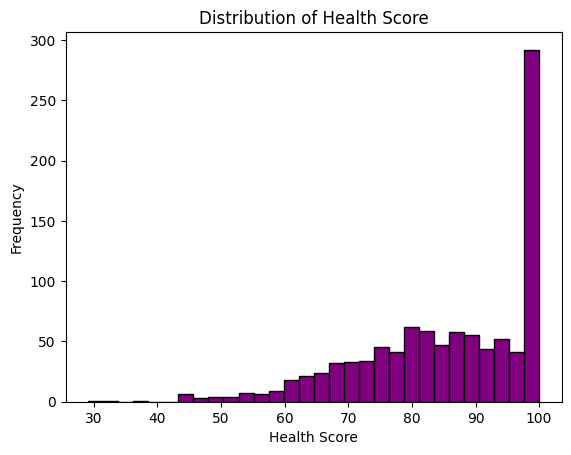

In [ ]:
plt.hist(df['Health_Score'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Health Score')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()

According the above digram The health score is skewed to the left.

# **Understanding the Box Plot & Outliers**

---



A box plot is a valuable tool for visualizing the distribution of a dataset. It helps identify how values are spread and highlights the presence of any unusual data points.

**Q1 (25th percentile):** 25% of the data points fall below this value.

**Q2 (Median / 50th percentile):** This is the middle value of the dataset.

**Q3 (75th percentile):** 75% of the data points fall below this value.

The box in the box plot spans from Q1 to Q3, representing the Interquartile Range (IQR)—the middle 50% of the data.

# **Detecting Outliers**

---



---


Outliers are data points that fall significantly outside the typical range. To detect them, we calculate:

IQR = Q3 - Q1

Lower Bound = Q1 − 1.5 × IQR

Upper Bound = Q3 + 1.5 × IQR

Any point outside these bounds is considered an outlier, and appears as individual dots or circles on the plot.

**Why This Matters, Outliers can:**

Distort the results of machine learning models

Impact the mean and variance

Lead to incorrect conclusions if not addressed

It’s essential to identify and handle them carefully—whether by removing, imputing, or analyzing their cause.

<Axes: xlabel='Health_Score'>

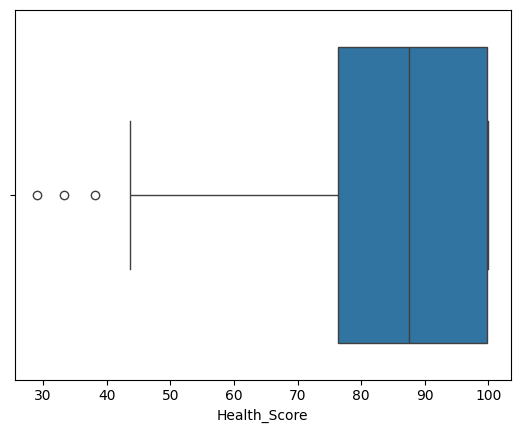

In [ ]:
# Let's draw a boxplot for our dependent variable Health_Score:
sns.boxplot(x = df['Health_Score'])

Showing skewed Health score data to the left,with 50% of health score data fells between 75% and 100%, having two limits boundaries, the lower and the upper boundes that everything that exceeds these two boundaries it considered as an outliers, that may affect our data.

**Visualizing the outliers by the hepls of the box plot**

---



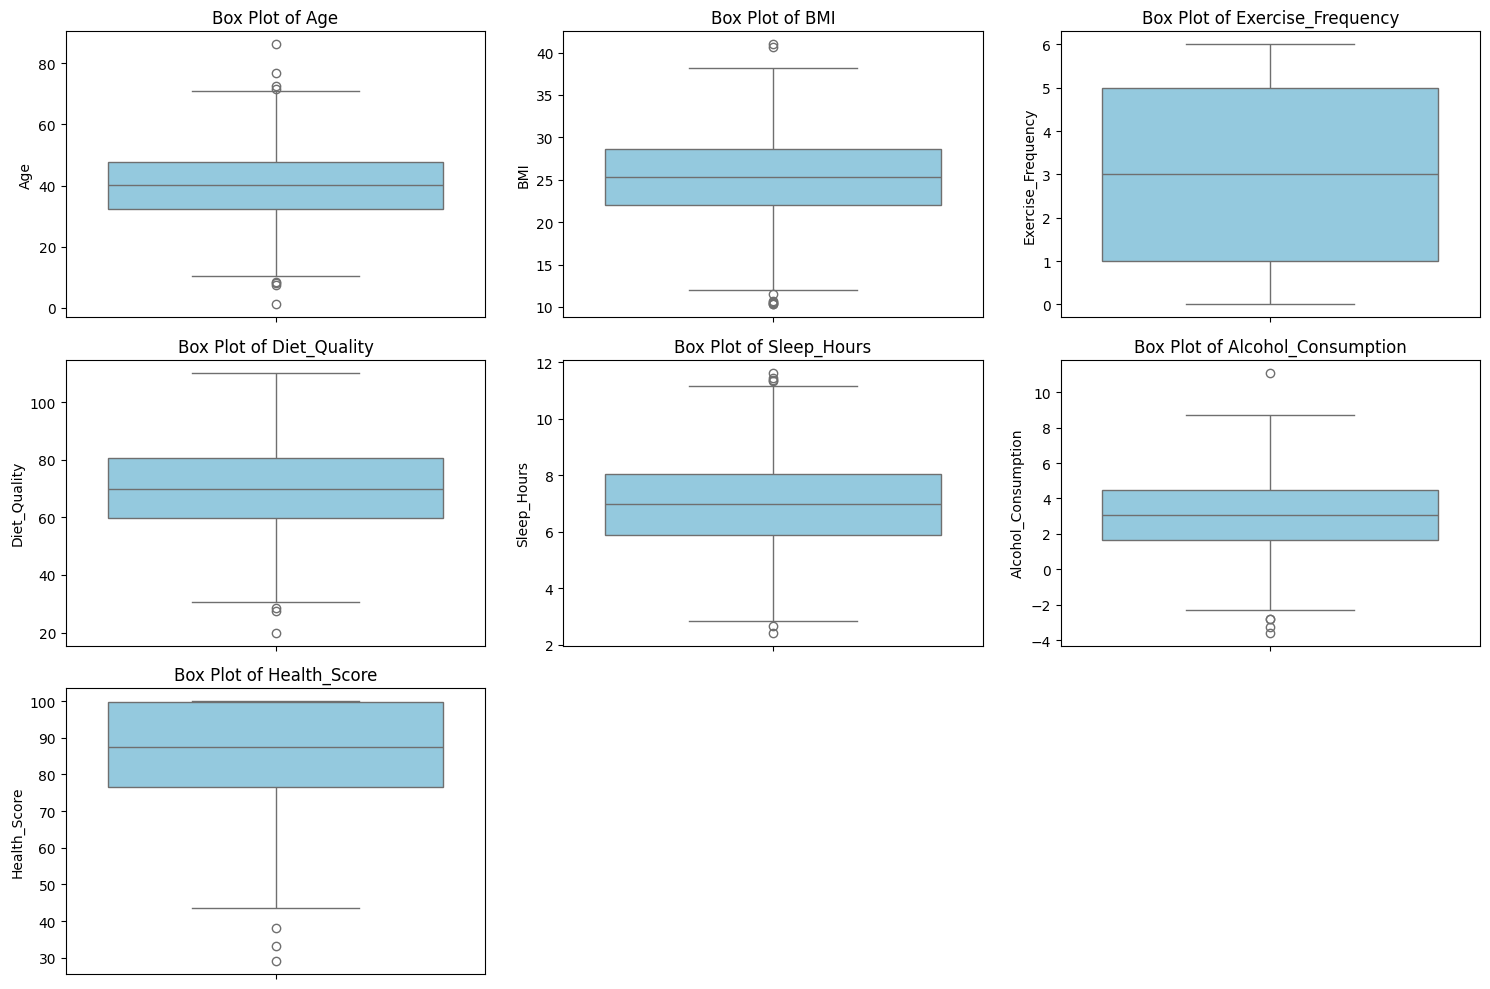

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_cols = ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality',
                  'Sleep_Hours', 'Alcohol_Consumption', 'Health_Score']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


# **Removing Outliers**

---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Remove outliers using IQR for all numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter entire DataFrame (keep only rows without any outlier)
df_no_outliers = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show the difference in row count
print(f"Original rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df_no_outliers.shape[0]}")


Original rows: 1000
Rows after outlier removal: 967


# **Exploratory Data Analysis (EDA)**

---



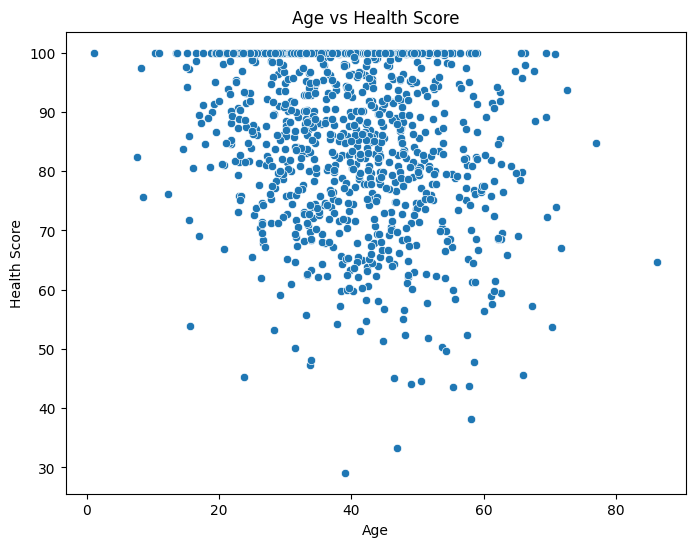

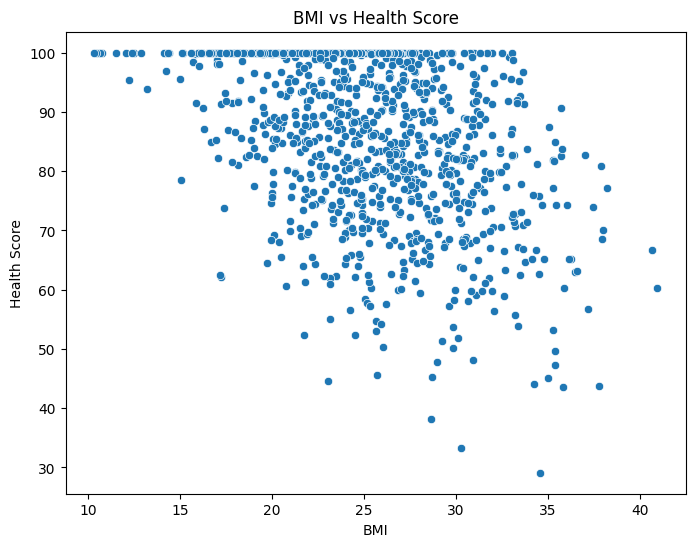

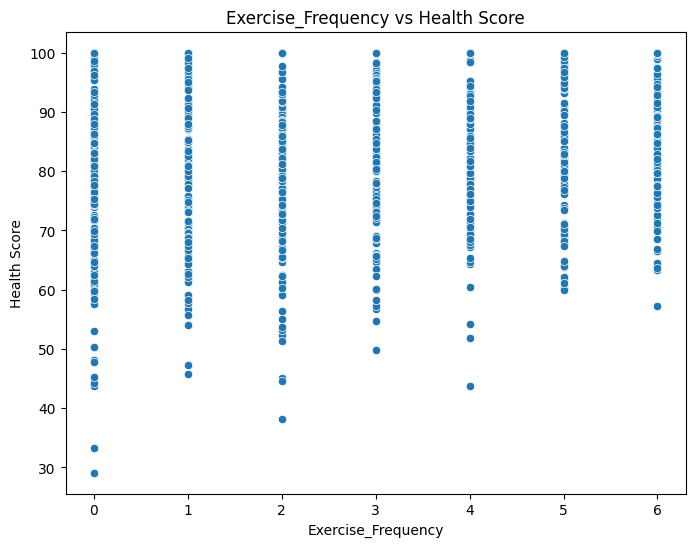

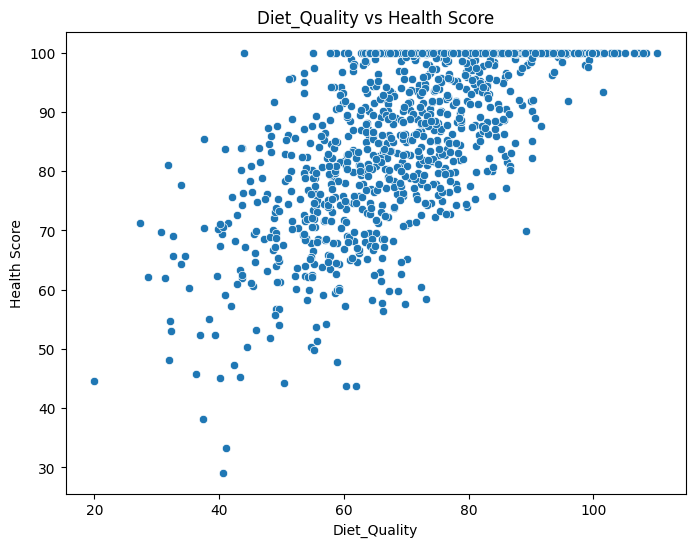

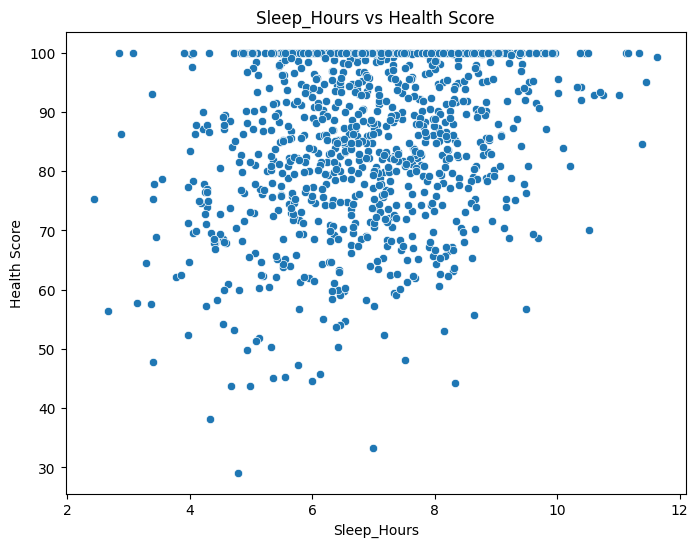

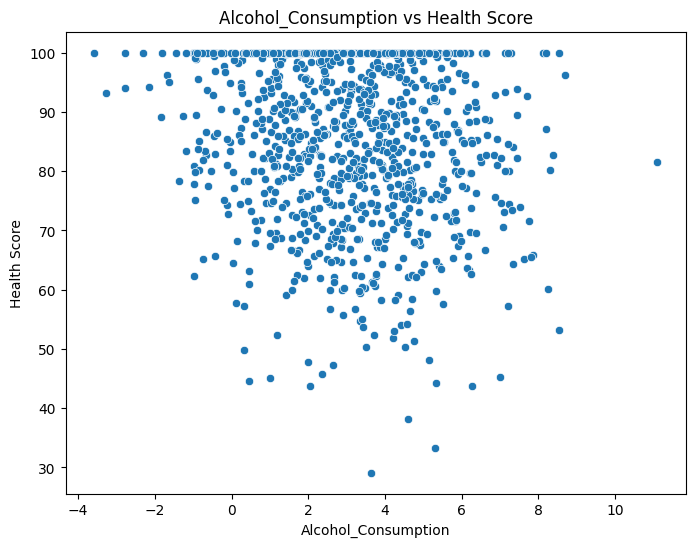

In [ ]:
# Scatter plots to visualize relationships
for col in numerical_cols:
    if col != 'Health_Score':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[col], y=df['Health_Score'])
        plt.title(f'{col} vs Health Score')
        plt.xlabel(col)
        plt.ylabel('Health Score')
        plt.show()


This feature (Diet_Quality) is a strong candidate as a predictor in your regression model.
It has a clear, meaningful relationship with the target (Health_Score), which is exactly what you want for building a good model. it have a postive correlation since the diet Quality increases as the health score increase and in the same direction the varies in the same direction so they are positive.

The feature BMI is slightly candidate as a predictor, where it be negative corelation where as BMI as it increases the Health score is slightly decreases providing negative corelation

**Lets see the realtion between our features and our target**

---



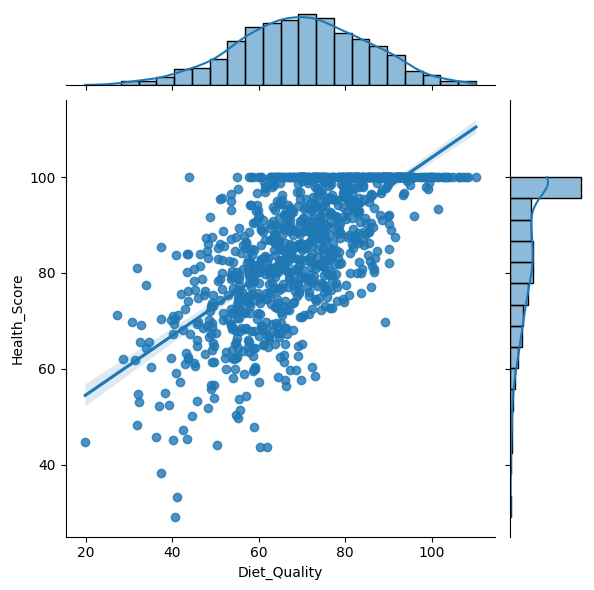

In [ ]:
import seaborn as sns
focused_Vs = df.loc[:, ["Diet_Quality", "Health_Score"]]

sns.jointplot(x = "Diet_Quality",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

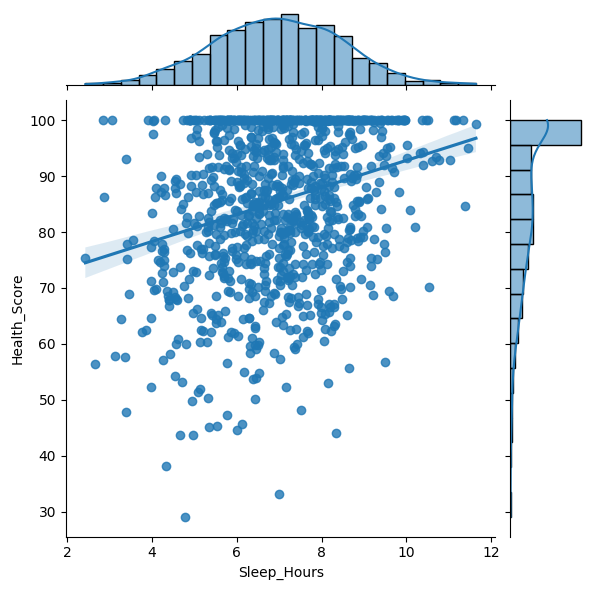

In [ ]:
import seaborn as sns
focused_Vs = df.loc[:, ["Sleep_Hours", "Health_Score"]]

sns.jointplot(x = "Sleep_Hours",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

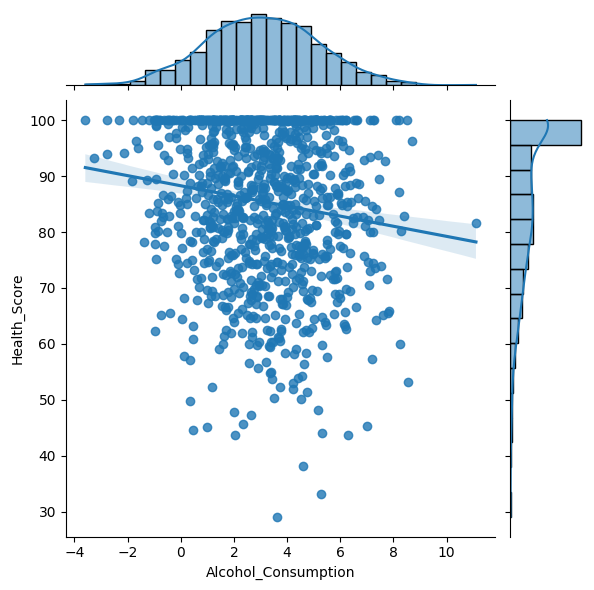

In [ ]:
import seaborn as sns
focused_Vs = df.loc[:, ["Alcohol_Consumption", "Health_Score"]]

sns.jointplot(x = "Alcohol_Consumption",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

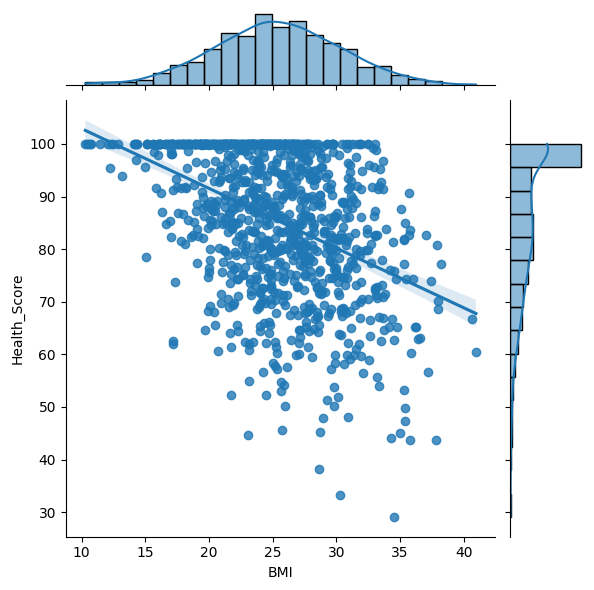

In [ ]:
import seaborn as sns
focused_Vs = df.loc[:, ["BMI", "Health_Score"]]

sns.jointplot(x = "BMI",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

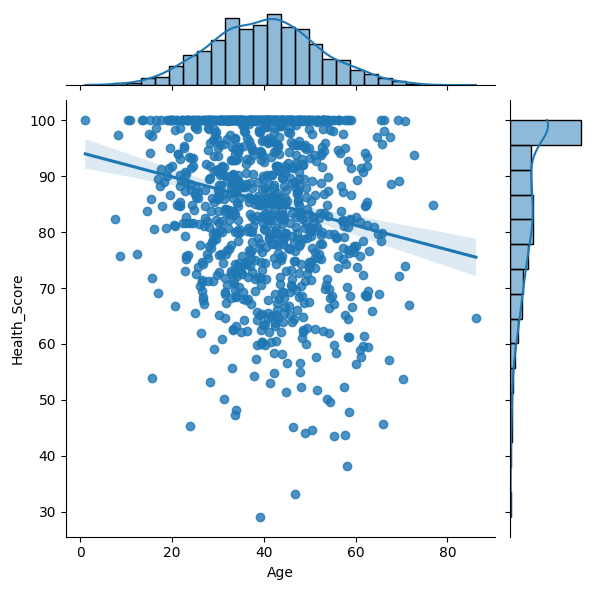

In [ ]:
import seaborn as sns
focused_Vs = df.loc[:, ["Age", "Health_Score"]]

sns.jointplot(x = "Age",
              y = "Health_Score",
              data = focused_Vs,
              kind="reg")

# **Data Preprocessing**

---



**Checking The data type of our features**

In [ ]:
print(df.dtypes)

Age                    float64
BMI                    float64
Exercise_Frequency       int64
Diet_Quality           float64
Sleep_Hours            float64
Smoking_Status           int64
Alcohol_Consumption    float64
Health_Score           float64
dtype: object


**Provong that no encoding needed**

In [ ]:
print(df['Smoking_Status'].unique())
print(df['Exercise_Frequency'].unique())


[0 1]
[5 6 2 3 4 1 0]


**Separate the features and the target**

In [ ]:
X = df.drop('Health_Score', axis=1)
y = df['Health_Score']


**Scaling the features and not the target**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Splite the scaled features and the target**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# **Regression Models**

---



# **Terminology and Important RoadMap**

---



# **Mean Absolute Error (MAE):**

---


Measures the average magnitude of the errors in predictions, without considering their direction. It tells us how far the predictions are from the actual values on average.

Lower MAE = better performance


# **Mean Squared Error (MSE):**

---


Calculates the average of the squared differences between predicted and actual values. It gives more weight to larger errors.

NOTE: More sensitive to outliers

# **Root Mean Squared Error (RMSE):**

---


The square root of MSE, giving an error measure in the same unit as the target variable. It is commonly used to evaluate model accuracy.


NOTE: Lower RMSE = better predictions

# **R² Score (Coefficient of Determination):**

---


Indicates how well the model explains the variability of the target variable.

R² = 1 → perfect prediction

R² = 0 → no predictive power

R² < 0 → worse than predicting the mean
Warning -> A negative R² suggests the model is not suitable for the current data.

# **Regression Models Used**

---


**Linear Regression:**

---


A basic model that assumes a linear relationship between the features and the target variable. It serves as a baseline model for comparison.

Strength: Simplicity and interpretability

Limitation: Poor fit for non-linear patterns

**Ridge Regression:**

---


An extension of linear regression that includes L2 regularization to reduce overfitting by shrinking coefficients.

Useful when multicollinearity exists among features

Tends to improve stability of predictions

**Random Forest Regression:**

---


An ensemble learning method that builds multiple decision trees and averages their outputs for prediction.

Strength: Captures non-linear relationships and feature interactions

Robust to noise and overfitting

Handles both categorical and numerical data well

Support Vector Regression (SVR):
A regression technique that uses Support Vector Machines to fit the best boundary within a margin of tolerance.

Good for complex relationships

Works well with normalized data

## **In This Project, We will use both:**

---



**Simple Regression** to examine the impact of individual factors

**Multiple Regression** to predict Happiness Score using a combination of features like age, diet, stress, etc.

This helped us compare individual feature influence vs. the combined effect of lifestyle factors.

# **Simple Regression**

---



**Linear Regression Model**

---



Linear Regression is a supervised machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables. It works by fitting a straight line (called the regression line) through the data points to predict the target variable. The goal is to minimize the difference between the predicted and actual values.

The blue line is referred to as the best fit

Based on the given data points, we try to plot a line that models the relation across data points best

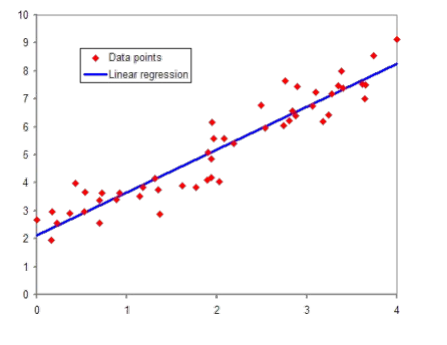

## **Linear Regression between the dependent variable health score and the independt variable diet quality**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Choose one independent feature for simple regression
X_simple = df[['Diet_Quality']]
y_simple = df['Health_Score']

# Then split again
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

In [ ]:
#Train The model
model = LinearRegression()
model.fit(X_train_simple,y_train_simple)

LinearRegression()

In [ ]:
#Making a sample prediction
y_pred = model.predict(X_test_simple)

In [ ]:
#Evaluating The Model
mae = mean_absolute_error(y_test_simple, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_simple, y_pred))
r2 = r2_score(y_test_simple, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 7.35
RMSE: 9.53
R² Score: 0.5338


The coefficient of determination is some how good but not higt we can say that 53% of the data fits our linear regression model. ALSO this is compitable to the result shown in the scattered figure in the data exploratory part.

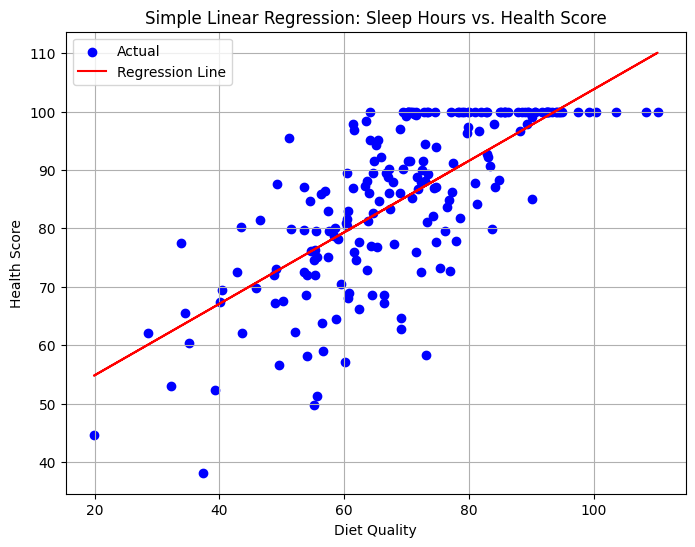

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred, color='red', label='Regression Line')
plt.xlabel('Diet Quality')
plt.ylabel('Health Score')
plt.title('Simple Linear Regression: Sleep Hours vs. Health Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Choose a sample index from the test set
sample_index = 5

# Extract feature and actual value
sample_X = X_test_simple.iloc[[sample_index]]
actual_y = y_test_simple.iloc[sample_index]

# Predict
predicted_y = model.predict(sample_X)[0]

print(f"Sample diet qaulity: {sample_X.values[0][0]:.2f}")
print(f"Actual Health Score: {actual_y:.2f}")
print(f"Predicted Health Score: {predicted_y:.2f}")

Sample diet qaulity: 55.40
Actual Health Score: 76.38
Predicted Health Score: 76.50


# **Multiple Regression**

---



**Linear Regression**

# **Train The Model**

In [ ]:
from sklearn.linear_model import LinearRegression
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Make predictions on test set
y_pred = model.predict(X_test)

# 3. Compare Actual vs Predicted for a few samples
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))

# 4. Store evaluation metrics
linear_r2 = r2_score(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)

# 5. Print separately
print("Linear Regression Results:")
print(f"R² Score: {linear_r2:.4f}")
print(f"MSE: {linear_mse:.4f}")
print(f"MAE: {linear_mae:.4f}")

       Actual   Predicted
0   78.259733   82.060610
1  100.000000   97.804941
2   84.654773   84.928832
3   88.754538   81.209931
4  100.000000  107.000214
5   76.382022   81.689841
6   89.495609   87.469935
7   98.429975   97.513311
8  100.000000   94.140920
9   91.486787   88.616788
Linear Regression Results:
R² Score: 0.8140
MSE: 37.9241
MAE: 4.7322


This show a high coeffiecient of determination close to 1, indicating that about 81% of the data fit the model which is great. So this model can Fits 81 % of data

**Visualization of the actual and the predicted**

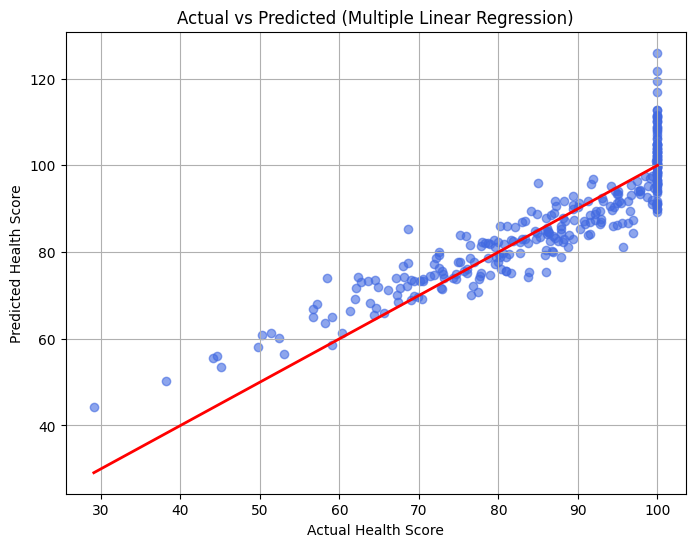

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # perfect prediction line
plt.xlabel("Actual Health Score")
plt.ylabel("Predicted Health Score")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.grid(True)
plt.show()

**Ridge Regression**
---

An extension of linear regression that incorporates L2 regularization, adding a penalty term for having large coefficient. This helps prevent overfitting and manages multicollinearity among features, leading to more stable and generalized models.

**Workflow:**

---



Initialize Ridge regression with alpha=1.0, train it on the training data, and evaluate its performance on the test set using MAE, MSE, and RMSE.
To illustrate the model's predictive ability, perform a prediction for the first test sample, comparing it to the actual value.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Initialize and train Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 2. Predict
y_pred_ridge = ridge.predict(X_test)

# 3. Store evaluation metrics
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

# 4. Print separately
print("Ridge Regression Results:")
print(f"R² Score: {ridge_r2:.4f}")
print(f"MSE: {ridge_mse:.4f}")
print(f"MAE: {ridge_mae:.4f}")

Ridge Regression Results:
R² Score: 0.8141
MSE: 37.9039
MAE: 4.7324


In [ ]:
# Pick a sample index
sample_index = 10

# Extract input feature and true value
sample_X_ridge = X_test[[sample_index]]
actual_y_ridge = y_test[sample_index]

# Predict
predicted_y_ridge = ridge.predict(sample_X_ridge)[0]

# Display
print("Ridge Regression")
print(f"Actual Health Score: {actual_y_ridge:.2f}")
print(f"Predicted Health Score: {predicted_y_ridge:.2f}")

Ridge Regression
Actual Health Score: 79.97
Predicted Health Score: 110.12


we can see there is huge difference between the acutal value and the predicted one

# Random Forest Regression
An ensemble learning technique that constructs multiple decision trees during training and outputs the average prediction of all trees. This approach is capable of modeling complex, non-linear relationships and is less sensitive to overfitting, especially with noisy or large feature sets.  

- **Workflow:**  
  Initialize the Random Forest with 100 trees, train it on the training data, and generate predictions on the test set.  
  Performance is measured using the same metrics, allowing comparisons with other models.  
  Predictions for specific samples can be obtained in the same manner as with linear models.  
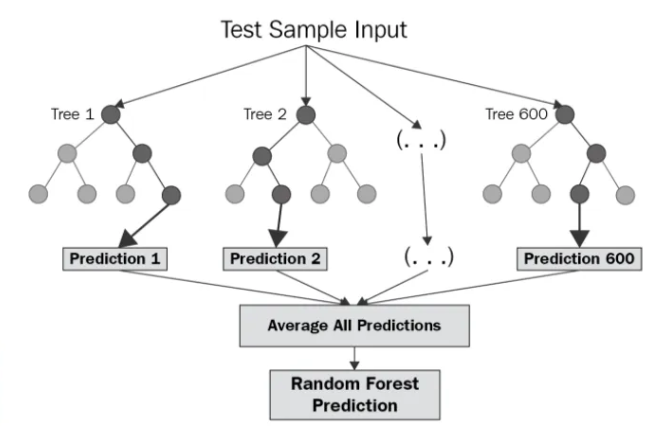

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predict
y_pred_rf = rf.predict(X_test)

# 3. Store evaluation metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# 4. Print separately
print("Random Forest Regression Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Random Forest Regression Results:
R² Score: 0.8301
MSE: 34.6518
MAE: 4.2595


In [ ]:
# Use the same sample index for fair comparison
sample_X_rf = X_test[[sample_index]]
actual_y_rf = y_test[sample_index]

# Predict
predicted_y_rf = rf.predict(sample_X_rf)[0]

# Display
print("Random Forest Regression")
print(f"Actual Health Score: {actual_y_rf:.2f}")
print(f"Predicted Health Score: {predicted_y_rf:.2f}")

Random Forest Regression
Actual Health Score: 79.97
Predicted Health Score: 99.84


In [ ]:
# Recalculate metrics for each model and assign to variables
# Linear Regression metrics were already calculated and assigned to mae, mse, rmse
mae_linear = mae
mse_linear = mse
rmse_linear = rmse

# Ridge Regression metrics
y_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Random Forest Regression metrics
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Create a summary DataFrame
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Ridge Regression"],
    "MAE": [mae_linear, mae_rf, mae_ridge],
    "MSE": [mse_linear, mse_rf, mse_ridge],
    "RMSE": [rmse_linear, rmse_rf, rmse_ridge]
})

# Round results for readability
results_df = results_df.round(4)
print(results_df)

               Model     MAE      MSE    RMSE
0  Linear Regression  4.7322  37.9241  6.1583
1      Random Forest  4.2595  34.6518  5.8866
2   Ridge Regression  4.7324  37.9039  6.1566


# **Comparing The Coeffiecient of determination R squared**

---



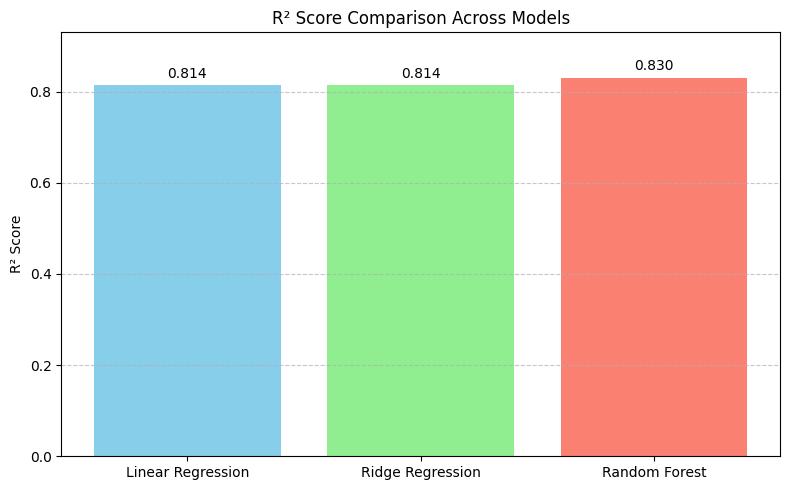

In [ ]:
import matplotlib.pyplot as plt

# Model names and corresponding R² scores
model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest']
r2_scores = [linear_r2, ridge_r2, rf_r2]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color=['skyblue', 'lightgreen', 'salmon'])

# Add R² value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.title("R² Score Comparison Across Models")
plt.ylabel("R² Score")
plt.ylim(0, max(r2_scores) + 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Clear comparison of how well each model explains the variance in our target (Health_Score).**

We can say that Random Forest Multiple Regression is the best Model that can expalins and fits our data, where 83% Of our data fits this model, and this model can expalins about 83% of our data.

**The higher the bar, the better the model performance**.

# **Final Interpretation about what is the best model**

---



In [ ]:
# Linear Regression metrics
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

# Ridge Regression metrics
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

# Random Forest metrics
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

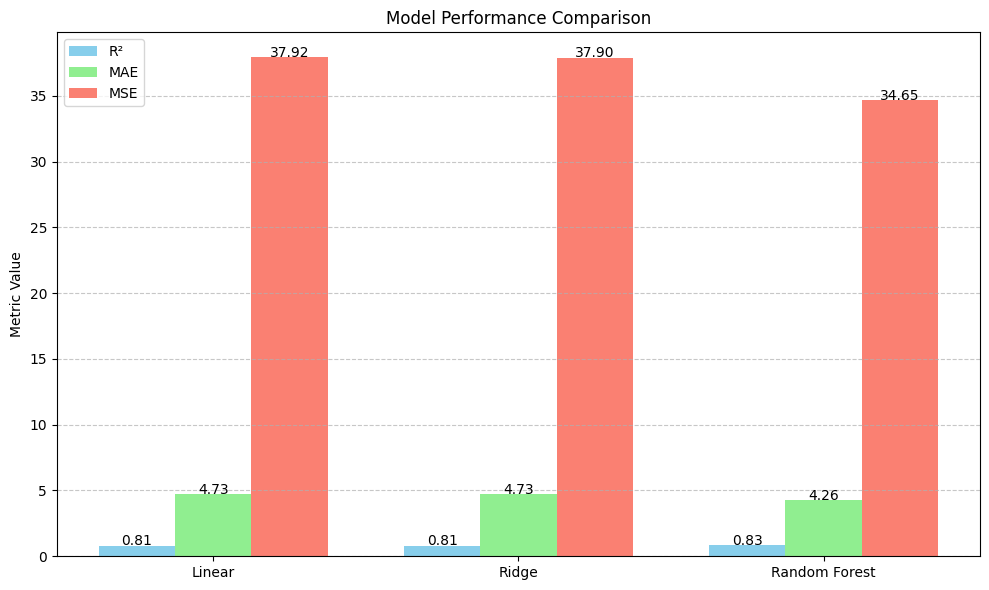

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear', 'Ridge', 'Random Forest']

# Metrics
r2_scores = [linear_r2, ridge_r2, rf_r2]
mae_scores = [linear_mae, ridge_mae, rf_mae]
mse_scores = [linear_mse, ridge_mse, rf_mse]

# X-axis positions
x = np.arange(len(models))
width = 0.25

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, r2_scores, width=width, label='R²', color='skyblue')
plt.bar(x, mae_scores, width=width, label='MAE', color='lightgreen')
plt.bar(x + width, mse_scores, width=width, label='MSE', color='salmon')

# Add value labels
for i in range(len(models)):
    plt.text(x[i] - width, r2_scores[i] + 0.01, f'{r2_scores[i]:.2f}', ha='center')
    plt.text(x[i], mae_scores[i] + 0.01, f'{mae_scores[i]:.2f}', ha='center')
    plt.text(x[i] + width, mse_scores[i] + 0.01, f'{mse_scores[i]:.2f}', ha='center')

# Formatting
plt.xticks(x, models)
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


It is clear again that the Random Forest is the best regression model used to model our data and predict it since it has the highest R squared which tell us the how do the model fits our data also it has the lowest metrices errors which is the aim to reduce the errors between the actual and the predicted one